
<h2 style="text-align:center;">MOVIE INDUSTRY PERFORMANCE CORRELATION ANALYSIS</h2>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## Objective

The main goal of this analysis revolves around the question, "What factors contribute most to the success of a movie?". This is achieved by performing a correlation analysis, where the production company, the movie's budget, or other variables which play a significant role in determining a movie's success are measured against the gross earnings of the movie. This project aims to provide valuable insights that will assist movie production companies in making more informed decisions about which movies to produce, which companies to collaborate with, and how to allocate resources to maximise success.


## About The Data
The source of the data(csv file) is Kaggle. There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

- budget: the budget of a movie. Some movies don't have this, so it appears as 0
- company: the production company
- country: country of origin
- director: the director
- genre: main genre of the movie.
- gross: revenue of the movie
- name: name of the movie
- rating: rating of the movie (R, PG, etc.)
- released: release date (YYYY-MM-DD)
- runtime: duration of the movie
- score: IMDb user rating
- votes: number of user votes
- star: main actor/actress
- writer: writer of the movie
- year: year of release


## Contents
- Importing Libraries
- The data at a Glance
- Data Cleaning
- Data Exploration
- Further Data Exploration
- Conclusion of the Analysis

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Displays the matplotlib plots directly in the Jupyter notebook
%matplotlib inline 

# Adjusts the configuration of the plots
matplotlib.rcParams['figure.figsize'] = (12,8) 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# The Data at a Glance

### Reading in the data

In [3]:
# Use pandas to create a dataframe
df = pd.read_csv(r'C:\Users\USER\Desktop\DS.DA\Data Analysis with Python\Movie Industry\movies.csv\movies.csv')

### Looking at the data

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Data Cleaning

### Checking for missing data

In [5]:
# Loop through the columns of the data to check for missing data
for col in df.columns:
    perc_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(perc_missing*100)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


### Removing rows with missing data

As seen from the output, some columns have missing data so we drop the rows which contain missing data.

In [6]:
df = df.dropna()

### What are the data types of the columns?

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### We want to change the data type for the `budget` and `gross` columns

In [8]:
# Change data type of budget column
df['budget'] = df['budget'].astype('int64')

# Change data type of gross column
df['gross'] = df['gross'].astype('int64')

In [9]:
# Verifying the change
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


### Creating a new column to correct the year of release

When you dig into the data, you would realize that the year of release in the `year` column is not consistent with the year in the date of release in the `released` column. To fix that, we create a new column for the year of release by extracting the year from the `released` column.

In [10]:
df['correctyear'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


### Ordering the data according to gross revenue 

We wish to order the movies by the gross revenue generated.

In [12]:
# To view the whole dataset
#pd.set_option('display.max_rows', None)

# Ordering the data by gross
df.sort_values(by = ['gross'], inplace = False, ascending = False)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


### Removing duplicates from the data

In [13]:
# Drop duplicates and check the distinct values in the data
#df['company'].drop_duplicates().sort_values(ascending = False)

# Remove duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


### Checking for outliers

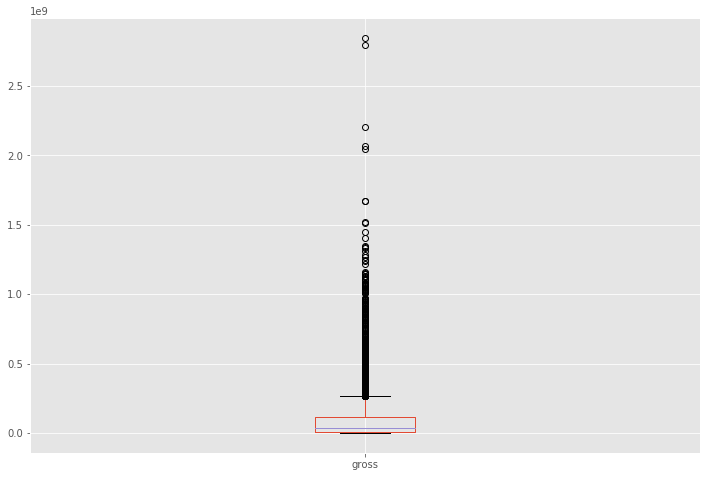

In [14]:
df.boxplot(column=['gross'])

### Removing outliers

In [15]:
z_scores = stats.zscore(df['gross'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

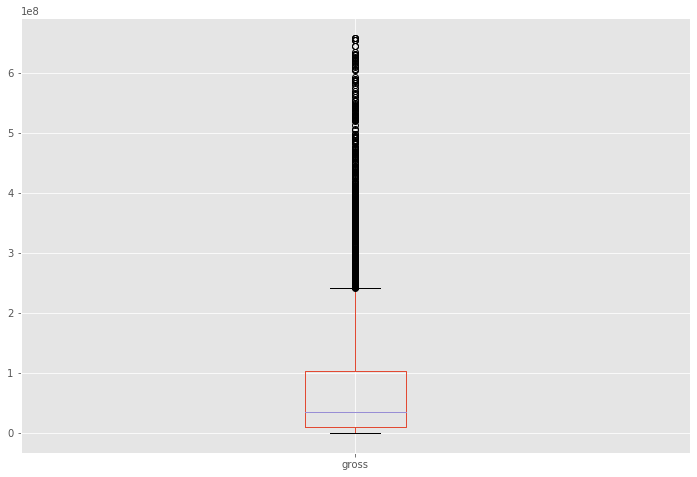

In [16]:
df.boxplot(column=['gross'])


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Data Exploration

In this section, we do a correlation analysis where we look at the correlation between factors such as `budget`, `company`, `genre`, etc and the success of a movie(representied by the movie's gross earnings). We do this by comparing these factors to the gross revenue of a movie.

## `Budget` vs `Gross Earnings`



### Scatter plot to visualize the relationship between `budget` and `gross` revenue

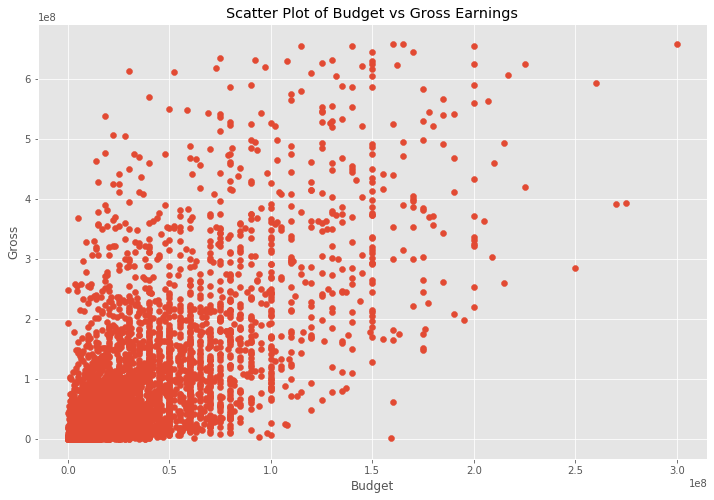

In [17]:
plt.scatter(x = df['budget'], y = df['gross'])

# Adding labels
plt.xlabel('Budget')
plt.ylabel('Gross')

# Title
plt.title('Scatter Plot of Budget vs Gross Earnings')

plt.show()

### Regression plot to get a better visualization between `budget` and `gross` revenue

It is not really easy to see the correlation in the scatter plot so we use a regression plot form seaborn instead.

Text(0.5, 1.0, 'Regression Plot of Budget vs Gross Earnings')

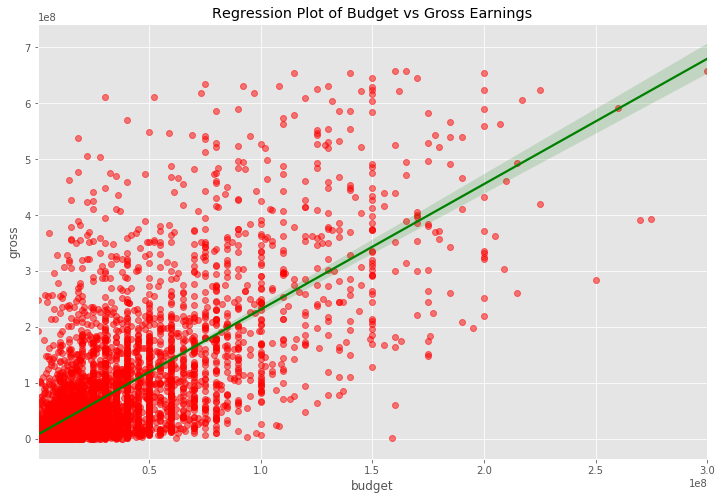

In [18]:
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red", "alpha": 0.5}, line_kws = {"color": "green"})

# Title
plt.title('Regression Plot of Budget vs Gross Earnings')


 From the regression plot above, the line ascending towards the right signifies a positive correlation between `budget` and `gross` earnings.

## `Numeric Variables` vs `Gross Earnings`

### Correlation matrix to visualize which variables(focus on numeric variables) correlate most to gross earnings

We use the correlation matrix to visualize how much correlation there is between the variables and the gross earnings.

In [19]:
df.corr(method = 'pearson')

# There are different types of correlation methods: pearson, kendall, spearman

,year,score,votes,budget,gross,runtime,correctyear
year,1.000000,0.039652,0.188084,0.299490,0.273173,0.052692,0.998689
score,0.039652,1.000000,0.463522,0.006633,0.189074,0.404840,0.045714
votes,0.188084,0.463522,1.000000,0.341460,0.579419,0.297797,0.185687
budget,0.299490,0.006633,0.341460,1.000000,0.700497,0.258880,0.291866
gross,0.273173,0.189074,0.579419,0.700497,1.000000,0.202622,0.266635
runtime,0.052692,0.404840,0.297797,0.258880,0.202622,1.000000,0.053386
correctyear,0.998689,0.045714,0.185687,0.291866,0.266635,0.053386,1.000000


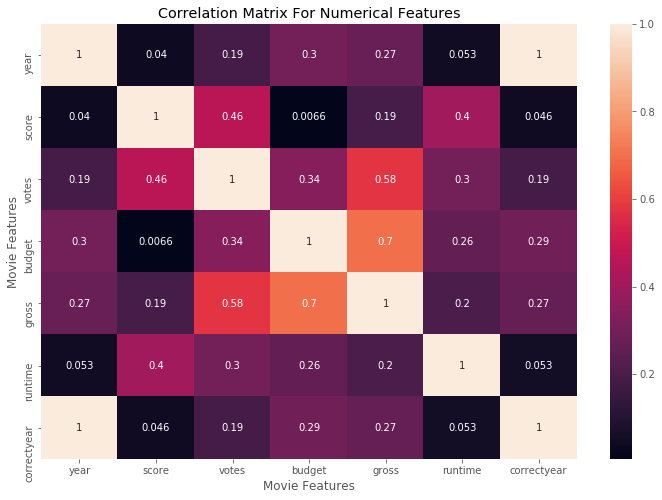

In [20]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

# Adding labels
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# Title
plt.title('Correlation Matrix For Numerical Features')

plt.show()

## `Company` vs `Gross Earnings`


Since `Company` is not in numeric format we cannot use a correlation matrix to directly compare with the gross earnings as done above. So instead, we first update the columns without numeric values by assigning to them numeric values based on rankings or categories.

### Correlation matrix to visualize which variables(including non-numeric variables) correlate most to gross earnings

In [21]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'): #we exclude the month column due to the slicing done
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,4586,6,6,1980,1278,8.4,927000.0,1789,2819,692,46,19000000,46998772,1418,146.0,1980
1,3840,6,1,1980,1111,5.8,65000.0,1573,1151,212,47,4500000,58853106,448,104.0,1980
2,3557,4,0,1980,1333,8.7,1200000.0,755,1807,1148,47,18000000,538375067,938,124.0,1980
3,203,4,4,1980,1111,7.7,221000.0,887,1403,1463,47,3500000,83453539,1100,88.0,1980
4,722,6,4,1980,1152,7.3,108000.0,717,350,269,47,6000000,39846344,1075,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,408,6,0,2020,892,6.6,140000.0,16,2377,1800,47,90000000,426505244,448,124.0,2020
7649,3481,4,0,2020,702,6.5,102000.0,850,2296,146,47,85000000,319715683,1100,99.0,2020
7650,1133,4,1,2020,892,5.6,53000.0,1803,2814,1459,47,175000000,245487753,1389,101.0,2020
7651,3889,4,1,2020,747,6.8,42000.0,294,2078,634,6,135000000,111105497,12,100.0,2020


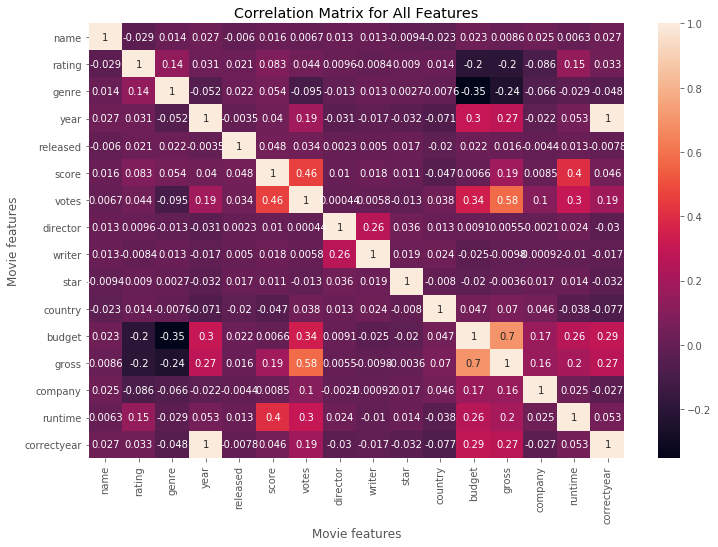

In [22]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for All Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

From the correlation matrix it is seen that there is very low correlation of about 0.16 between a company and the gross earnings of a movie.

## `All Variables` vs `Gross Earnings`


### Variables with the highest correlation

Now we want to filter our correlation matrix to show variables with the highest correlation so that it is easier to identify them.

In [24]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

# Correlations between pairs of variables
sorted_pairs = corr_pairs.sort_values()

# Filtering paired variables with high correlation
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.579419
votes        gross          0.579419
budget       gross          0.700497
gross        budget         0.700497
year         correctyear    0.998689
correctyear  year           0.998689
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

## Conclusion

From our correlation analysis, we find that `budget` and `votes` are the variables  which had the highest correlation with the gross earnings of a movie. Thus these are the factors which contribute most to the success of a movie.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Further Data Exploration

We have determined that `budget` and `votes` contribute most to the success of a movie. However in the section, we want to further analyse our data and answer a few questions which are essential in contributing to the success of a movie.

- What is the ideal runtime for a movie?
- What genre of movie has the most success on average?
- What genre of movie has the most success overall?


## What is the ideal runtime for a movie?

### Tabulating the data

In [25]:
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean()
gross_earnings_avg.sort_values()

runtime
209.0       968853.0
242.0      4770222.0
229.0      5473212.0
71.0       6582052.0
171.0      8064706.5
            ...     
151.0    422587580.5
181.0    424208848.0
183.0    449220945.0
163.0    497409852.0
187.0    562363449.0
Name: gross, Length: 124, dtype: float64

### Visualizing the data

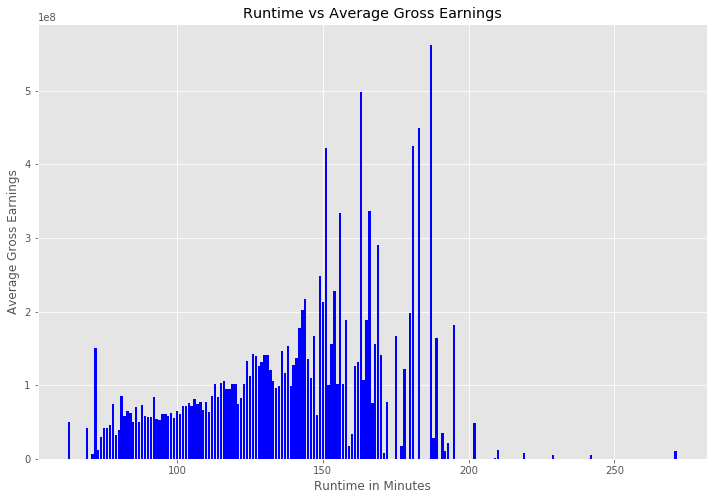

In [26]:
gross_avg = df.groupby(['runtime'])['gross'].mean()

plt.bar(gross_avg.index, gross_avg, color="blue")

plt.xlabel('Runtime in Minutes')
plt.ylabel('Average Gross Earnings')
plt.title('Runtime vs Average Gross Earnings')

plt.show()

The ideal runtime seems to be between 160 and 190 minutes.

## What genre of movie has the most success on average? What genre of movie has the most success overall?

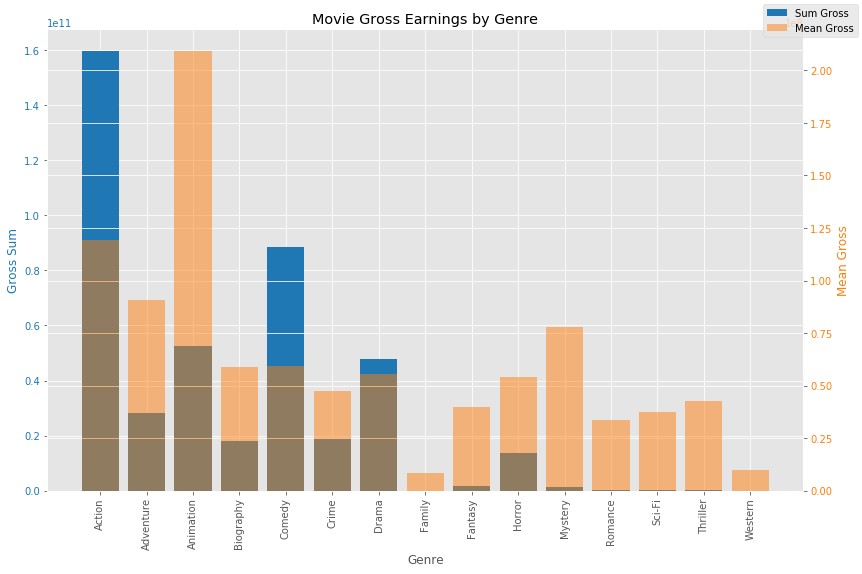

In [27]:
# The sum and mean of gross earnings for each genre
group_df = df.groupby(['genre'])['gross'].agg(['sum', 'mean'])
genres = group_df.index.tolist()
sum_gross = group_df['sum'].tolist()
mean_gross = group_df['mean'].tolist()

# Set up of the bar chart
fig, ax1 = plt.subplots()

# Plot of the bar chart for sum_gross
color = 'tab:blue'
ax1.bar(genres, sum_gross, color=color, label='Sum Gross')

# Labels
ax1.set_xlabel('Genre')
ax1.set_ylabel('Gross Sum', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Movie Gross Earnings by Genre')
plt.xticks(rotation=90)


# Creating a second y-axis for mean_gross and coefficient of variation
ax2 = ax1.twinx()

# Plot of the bar chart for mean_gross and coefficient of variation
color = 'tab:orange'
ax2.bar(genres, mean_gross, color=color, alpha=0.5, label='Mean Gross')

# Labels and title
ax2.set_ylabel('Mean Gross', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Legend
fig.legend()

# Adjusting the layout
fig.tight_layout()

plt.show()

The `Animation genre` had the highest average success rate, whereas the `Action genre` had the highest level of success across all movies.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Conclusion of the Analysis

The analysis revealed that the most significant factors contributing to a movie's success were the movie's budget and votes. The ideal runtime was between 160 and 190 minutes. Additionally, the action and animation genres of movies produced tended to be more successful than other genres.